In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [3]:
# Load pre-trained VGG16 model as a base
base = VGG16(include_top=False, input_shape=(32, 32, 3))
base.trainable = False  # Freeze the base model layers

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Build the model
model_template = models.Sequential([
    base,
    layers.Flatten(),
    layers.Dense(1200, activation="relu"),
    layers.Dense(100, activation="softmax")
])

In [5]:
# Optimizers to test
optimizers = ["adam", "sgd", "adagrad", "rmsprop", "nadam"]
histories = {}

In [10]:
# Train with each optimizer and store the history
for optimizer in optimizers:
    print(f"\nTraining with optimizer: {optimizer}\n")

    # Clone the model for each optimizer
    model = tf.keras.models.clone_model(model_template)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Train model with a reasonable batch size and steps per epoch
    history = model.fit(
        train_images, train_labels,
        epochs=5,
        validation_data=(test_images, test_labels),
        batch_size=128,  # Adjust the batch size for efficiency
       # steps_per_epoch=10,  # Steps per epoch for faster iteration
        verbose=1
    )

    # Save the training history
    histories[optimizer] = history


Training with optimizer: adam

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.0100 - loss: 4.6053 - val_accuracy: 0.0190 - val_loss: 4.6021
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0156 - loss: 4.5970 - val_accuracy: 0.0215 - val_loss: 4.5672
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0202 - loss: 4.5562 - val_accuracy: 0.0216 - val_loss: 4.5243
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0218 - loss: 4.5200 - val_accuracy: 0.0208 - val_loss: 4.5048
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0212 - loss: 4.5026 - val_accuracy: 0.0213 - val_loss: 4.4972

Training with optimizer: sgd

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.0099 - loss: 4.6052 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0093 - loss: 4.6052 - val_accuracy: 0.0099 - val_loss: 4.6051
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━

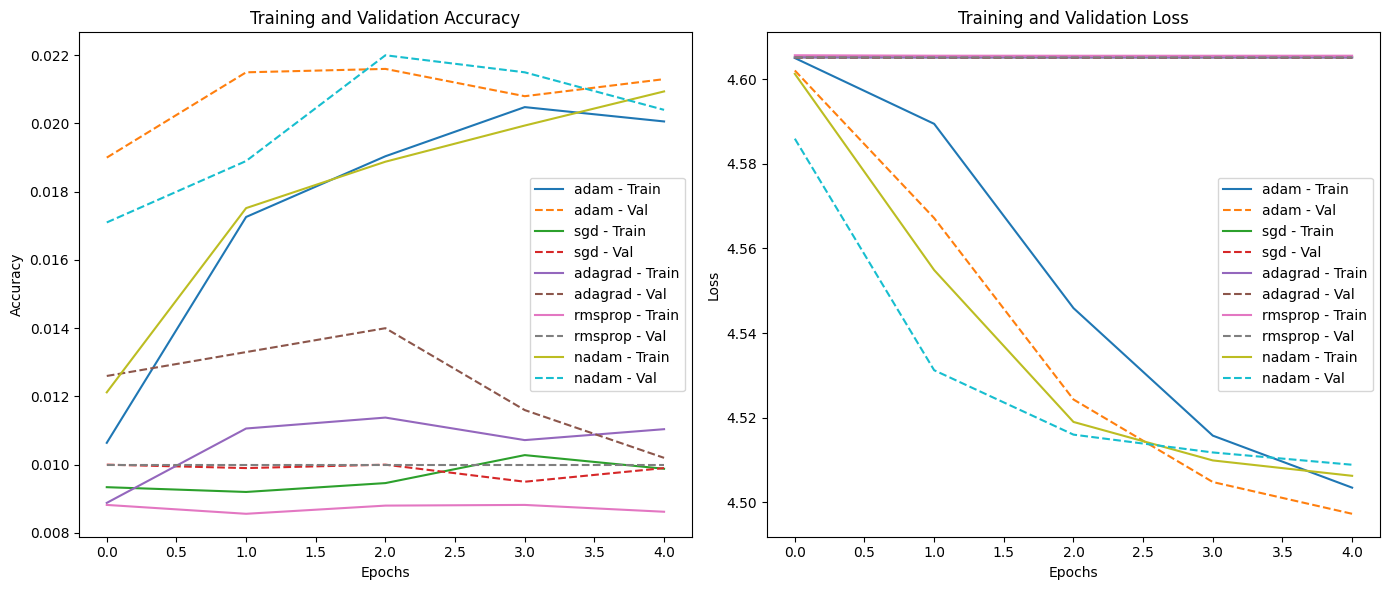

In [11]:
# Plot Accuracy and Loss for each optimizer
plt.figure(figsize=(14, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
for optimizer, history in histories.items():
    plt.plot(history.history['accuracy'], label=f"{optimizer} - Train")
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f"{optimizer} - Val")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
for optimizer, history in histories.items():
    plt.plot(history.history['loss'], label=f"{optimizer} - Train")
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f"{optimizer} - Val")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()